#Разведочный анализ данных. Исследование и визуализация данных.
##1) Текстовое описание набора данных
В качестве набора данных мы будем использовать набор данных о ценах на дома - https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/data

Эта задача является весьма актуальной для агентов по недвижимости, а также людей, заинтересованных в приобретении жилья.

Датасет состоит из одного файла с ценами на дома и описанием домов:

Housing.csv

Этот файл содержит следующие колонки:

* price - цена дома
* area - площадь дома
* bedrooms - количество спален
* bathrooms - количество ванных комнат
* stories - количество этажей
* mainroad - выходит ли на главную улицу
* guestroom - наличие гостевая комната
* basement - наличие подвала
* hotwaterheating - подогрев горячей воды
* airconditioning - наличие системы кондиционирования
* parking - количество парковочных мест
* prefarea - наличие переднего дворика
* furnishingstatus - меблированность дома (степень)

##*Импорт библиотек*
Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первой ячейке ноутбука, но мы в этом примере будем подключать все библиотеки последовательно, по мере их использования.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

##*Загрузка данных*
Загрузим файлы датасета с помощью библиотеки Pandas.
Не смотря на то, что файлы имеют расширение txt они представляют собой данные в формате CSV (https://ru.wikipedia.org/wiki/CSV). Часто в файлах такого формата в качестве разделителей используются символы ",", ";" или табуляция. Поэтому вызывая метод read_csv всегда стоит явно указывать разделитель данных с помощью параметра sep. Чтобы узнать какой разделитель используется в файле его рекомендуется предварительно посмотреть в любом текстовом редакторе.

In [ ]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('/content/Housing.csv', sep=",")

#2) Основные характеристики датасета

In [ ]:
# Первые 5 строк датасета
data.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [ ]:
# Размер датасета - 545 строк, 13 колонок
data.shape

(545, 13)

In [ ]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 545


In [ ]:
# Список колонок
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
# Список колонок с типами данных
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [ ]:
# Проверим есть ли пропущенные значения
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Пропущенных значений нет

In [ ]:
# Основные статистические характеристки набора данных
data.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

In [ ]:
cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'prefarea', 'furnishingstatus']
for col in cols:
 print(data[col]. unique ())

['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']
['yes' 'no']
['furnished' 'semi-furnished' 'unfurnished']


In [ ]:
data['mainroad'] = data['mainroad'].map({'yes':1, 'no':0})

In [ ]:
data['guestroom'] = data['guestroom'].map({'yes':1, 'no':0})
data['basement'] = data['basement'].map({'yes':1, 'no':0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes':1, 'no':0})
data['airconditioning'] = data['airconditioning'].map({'yes':1, 'no':0})
data['prefarea'] = data['prefarea'].map({'yes':1, 'no':0})
data['furnishingstatus'] = data['furnishingstatus'].map({'unfurnished':0, 'semi-furnished':1, 'furnished':2})

In [ ]:
# Основные статистические характеристки набора данных
data.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

         mainroad   guestroom    basement  hotwaterheating  airconditioning  \
count  545.000000  545.000000  545.000000       545.000000       545.000000   
mean     0.858716    0.177982    0.350459         0.045872         0.315596   
std      0.348635    0.382849    0.477552         0.209399         0.465180   
min      0.000000    0.000000    0.000000         0.000000         0.000000   
25%      1.000000    0.000000    0.000000         0.000000         0.000000   
50%      1.000000    0.000000    0.000000         0.000000         0.000000   
75%      1.000000    0.000000    1.000000         0.000000         1.000000   
max      1.000000    1.000000    1.000000         1.000000         1.000000   

          parking    prefarea  furnishingstatus  
count  545.000000  545.000000        545.000000  
mean     0.693578    0.234862          0.930275  
std      0.861586    0.424302          0.761373  
min      0.000000    0.000000          0.000000  
25%      0.000000    0.000000          0.000000  
50%      0.000000    0.000000          1.000000  
75%      1.000000    0.000000          2.000000  
max      3.000000    1.000000          2.000000

In [ ]:
data

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0                1        2         1   
1           0                0                1        3         0   
2           1                0                0        2         1   
3           1                0                1        3         1   
4           1                0                1        2         0   
..        ...              ...              ...      ...       ...   
540         1                0                0        2         0   
541         0                0                0        0         0   
542         0                0                0        0         0   
543         0                0                0        0         0   
544         0                0                0        0         0   

     furnishingstatus  
0                   2  
1                   2  
2                   1  
3                   2  
4                   2  
..                ...  
540                 0  
541                 1  
542                 0  
543                 2  
544                 0  

[545 rows x 13 columns]

In [ ]:
# Определим уникальные значения для целевого признака
data['price'].nunique()

219


Целевой признак не является бинарным. Если бы мы предсказывали цена на жильё, то эта задача была бы регрессией.

#3) Визуальное исследование датасета
Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

Посмотрим на распределение числовых переменных.

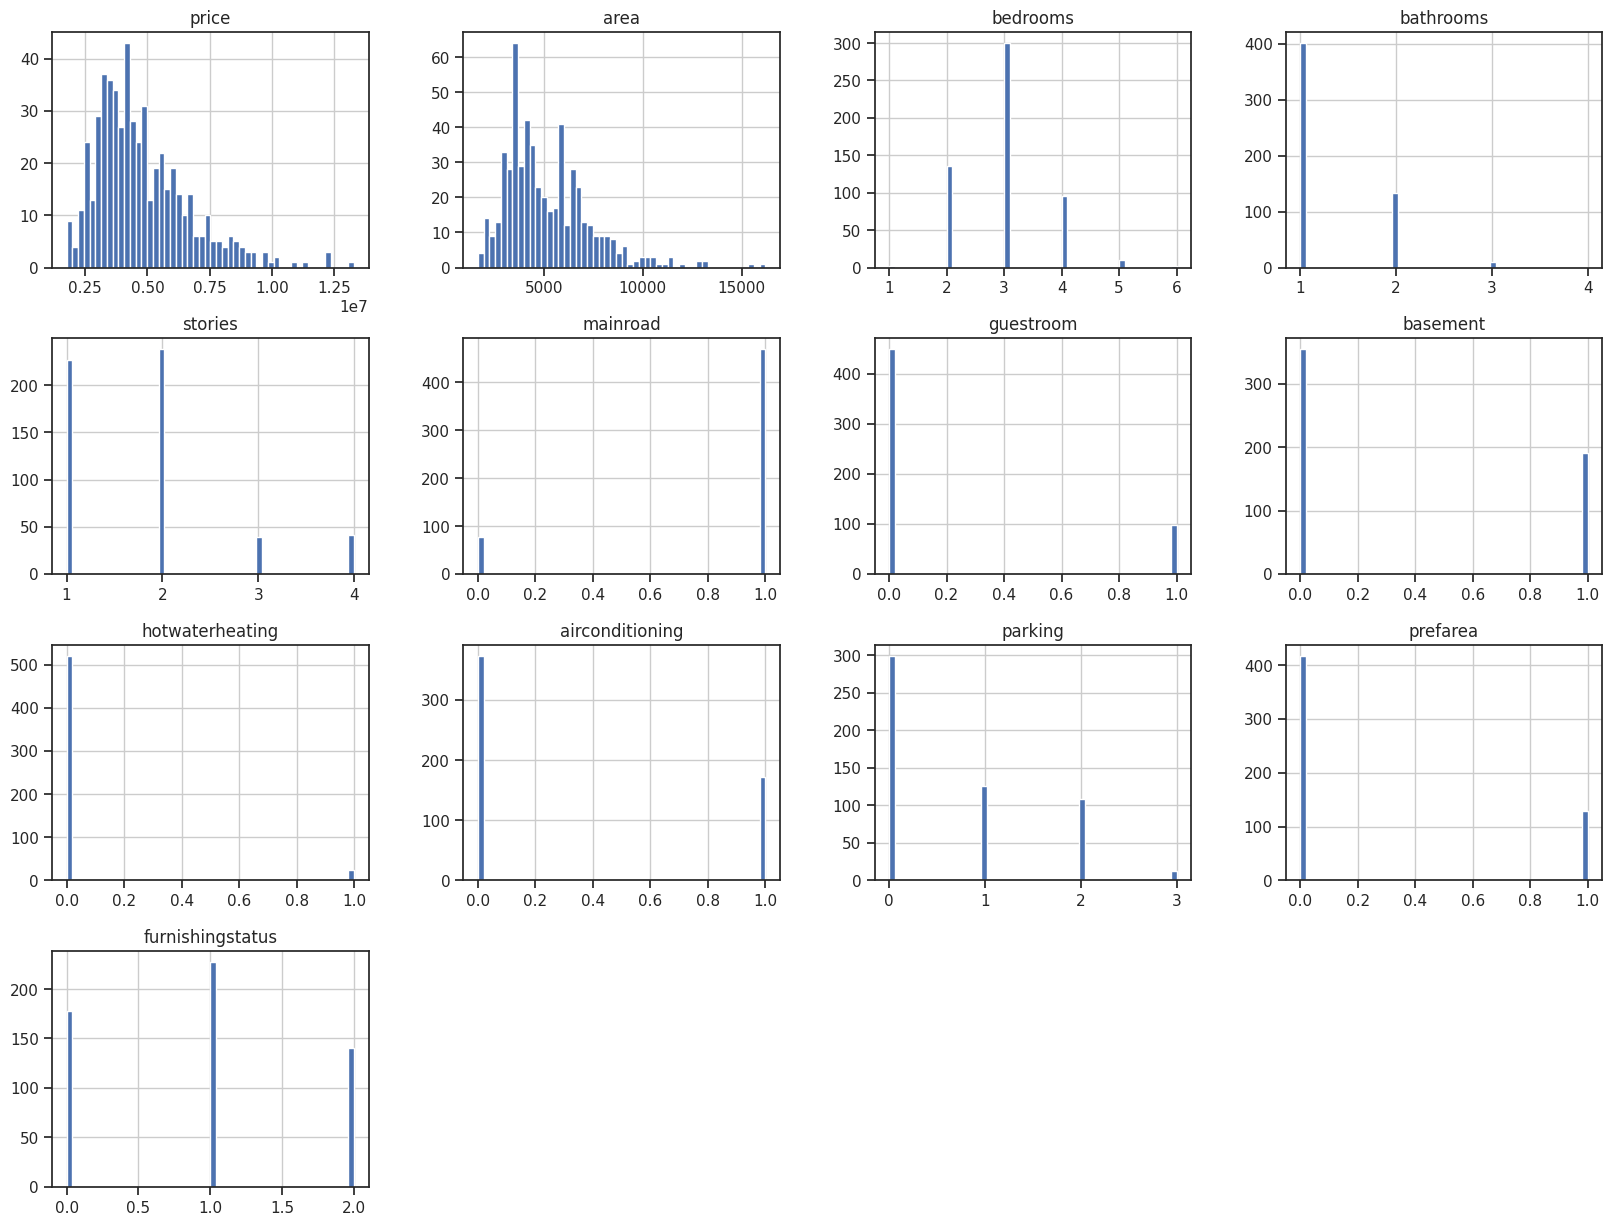

In [ ]:
data.hist(bins = 50, figsize = (20,15))
plt.show()

###*Диаграмма рассеяния*
Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

<Axes: xlabel='price', ylabel='area'>

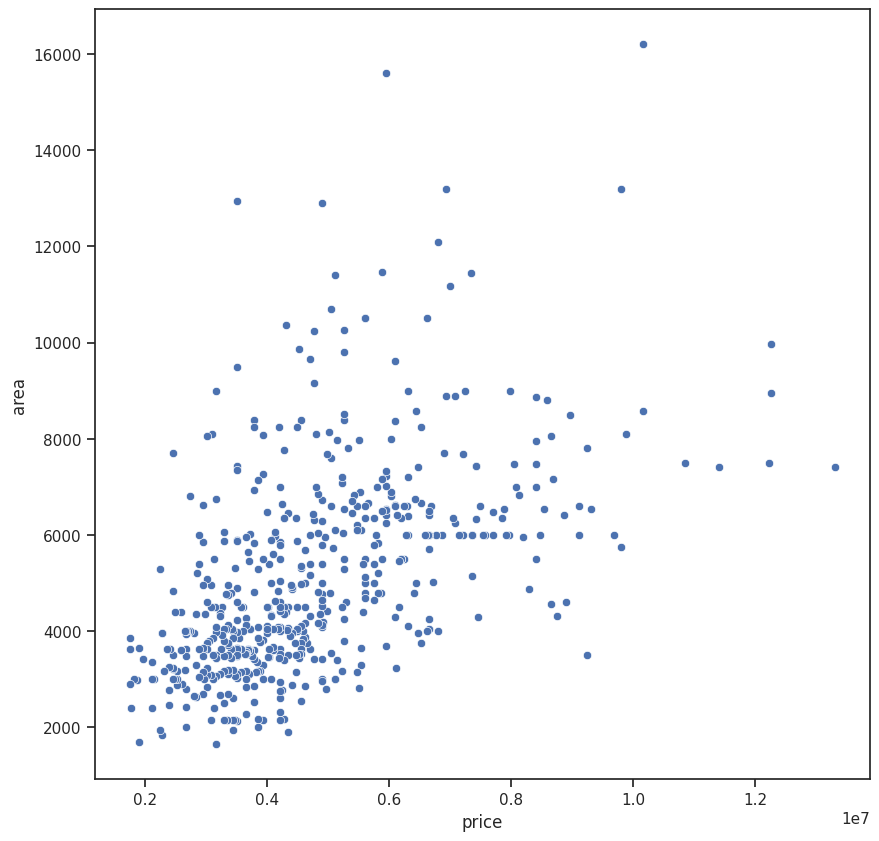

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='price', y='area', data=data)

Видно, что цена зависит от площади не линейно.

###*Гистограмма*
Позволяет оценить плотность вероятности распределения данных.

<ipython-input-82-ea9686ccf0f4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['area'])


<Axes: xlabel='area', ylabel='Density'>

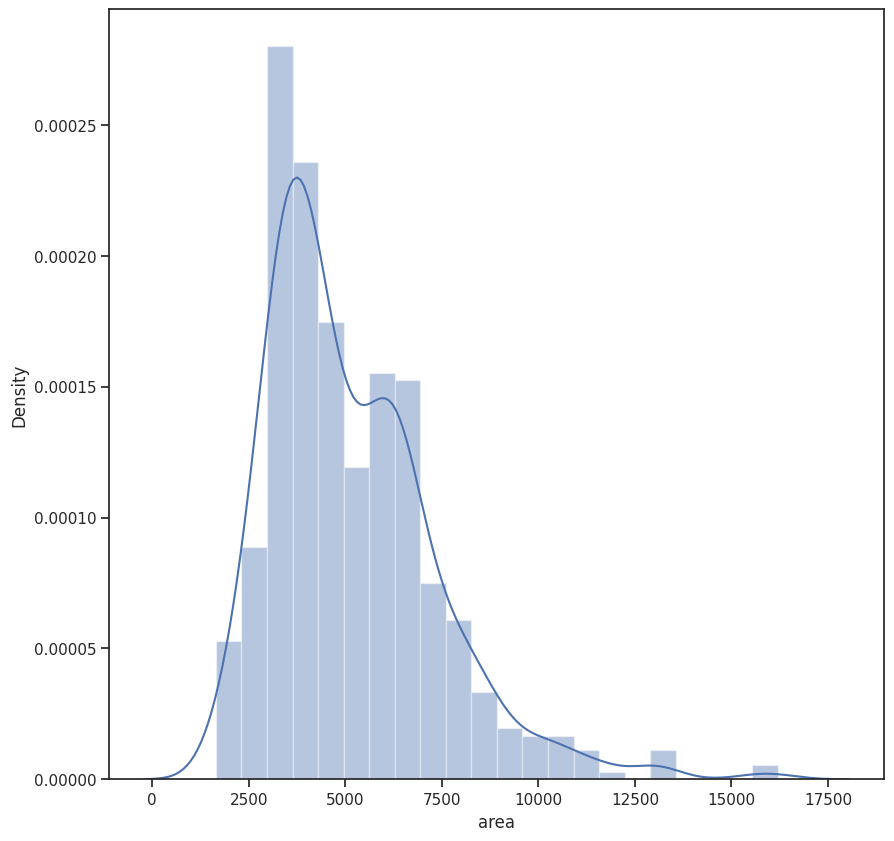

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(data['area'])

###*Jointplot*
Комбинация гистограмм и диаграмм рассеивания.

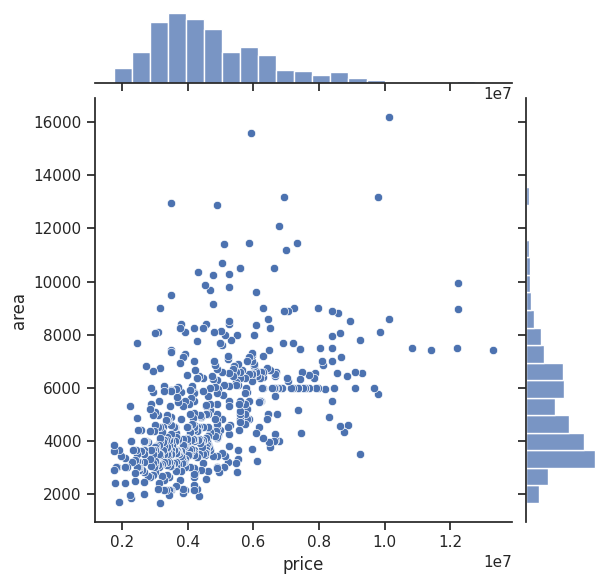

In [ ]:
sns.jointplot(x='price', y='area', data=data)

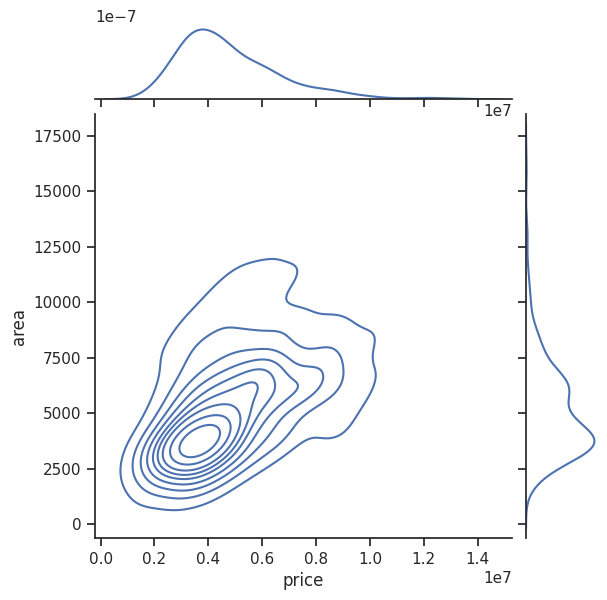

In [ ]:
sns.jointplot(x='price', y='area', data=data, kind="kde")

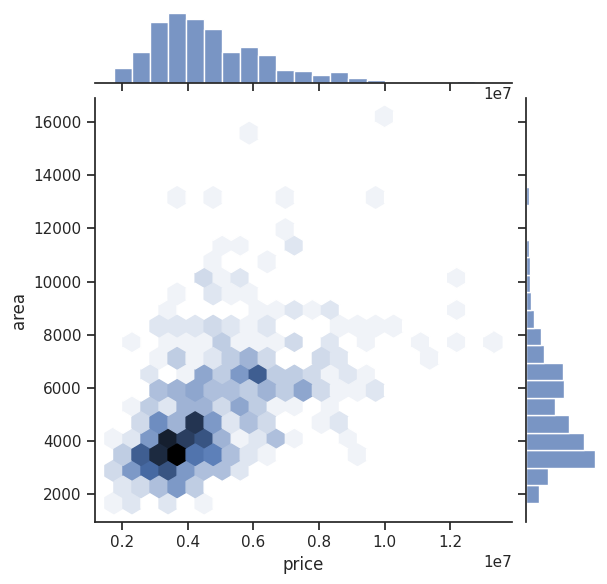

In [ ]:
sns.jointplot(x='price', y='area', data=data, kind="hex")

###*Парные диаграммы*
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

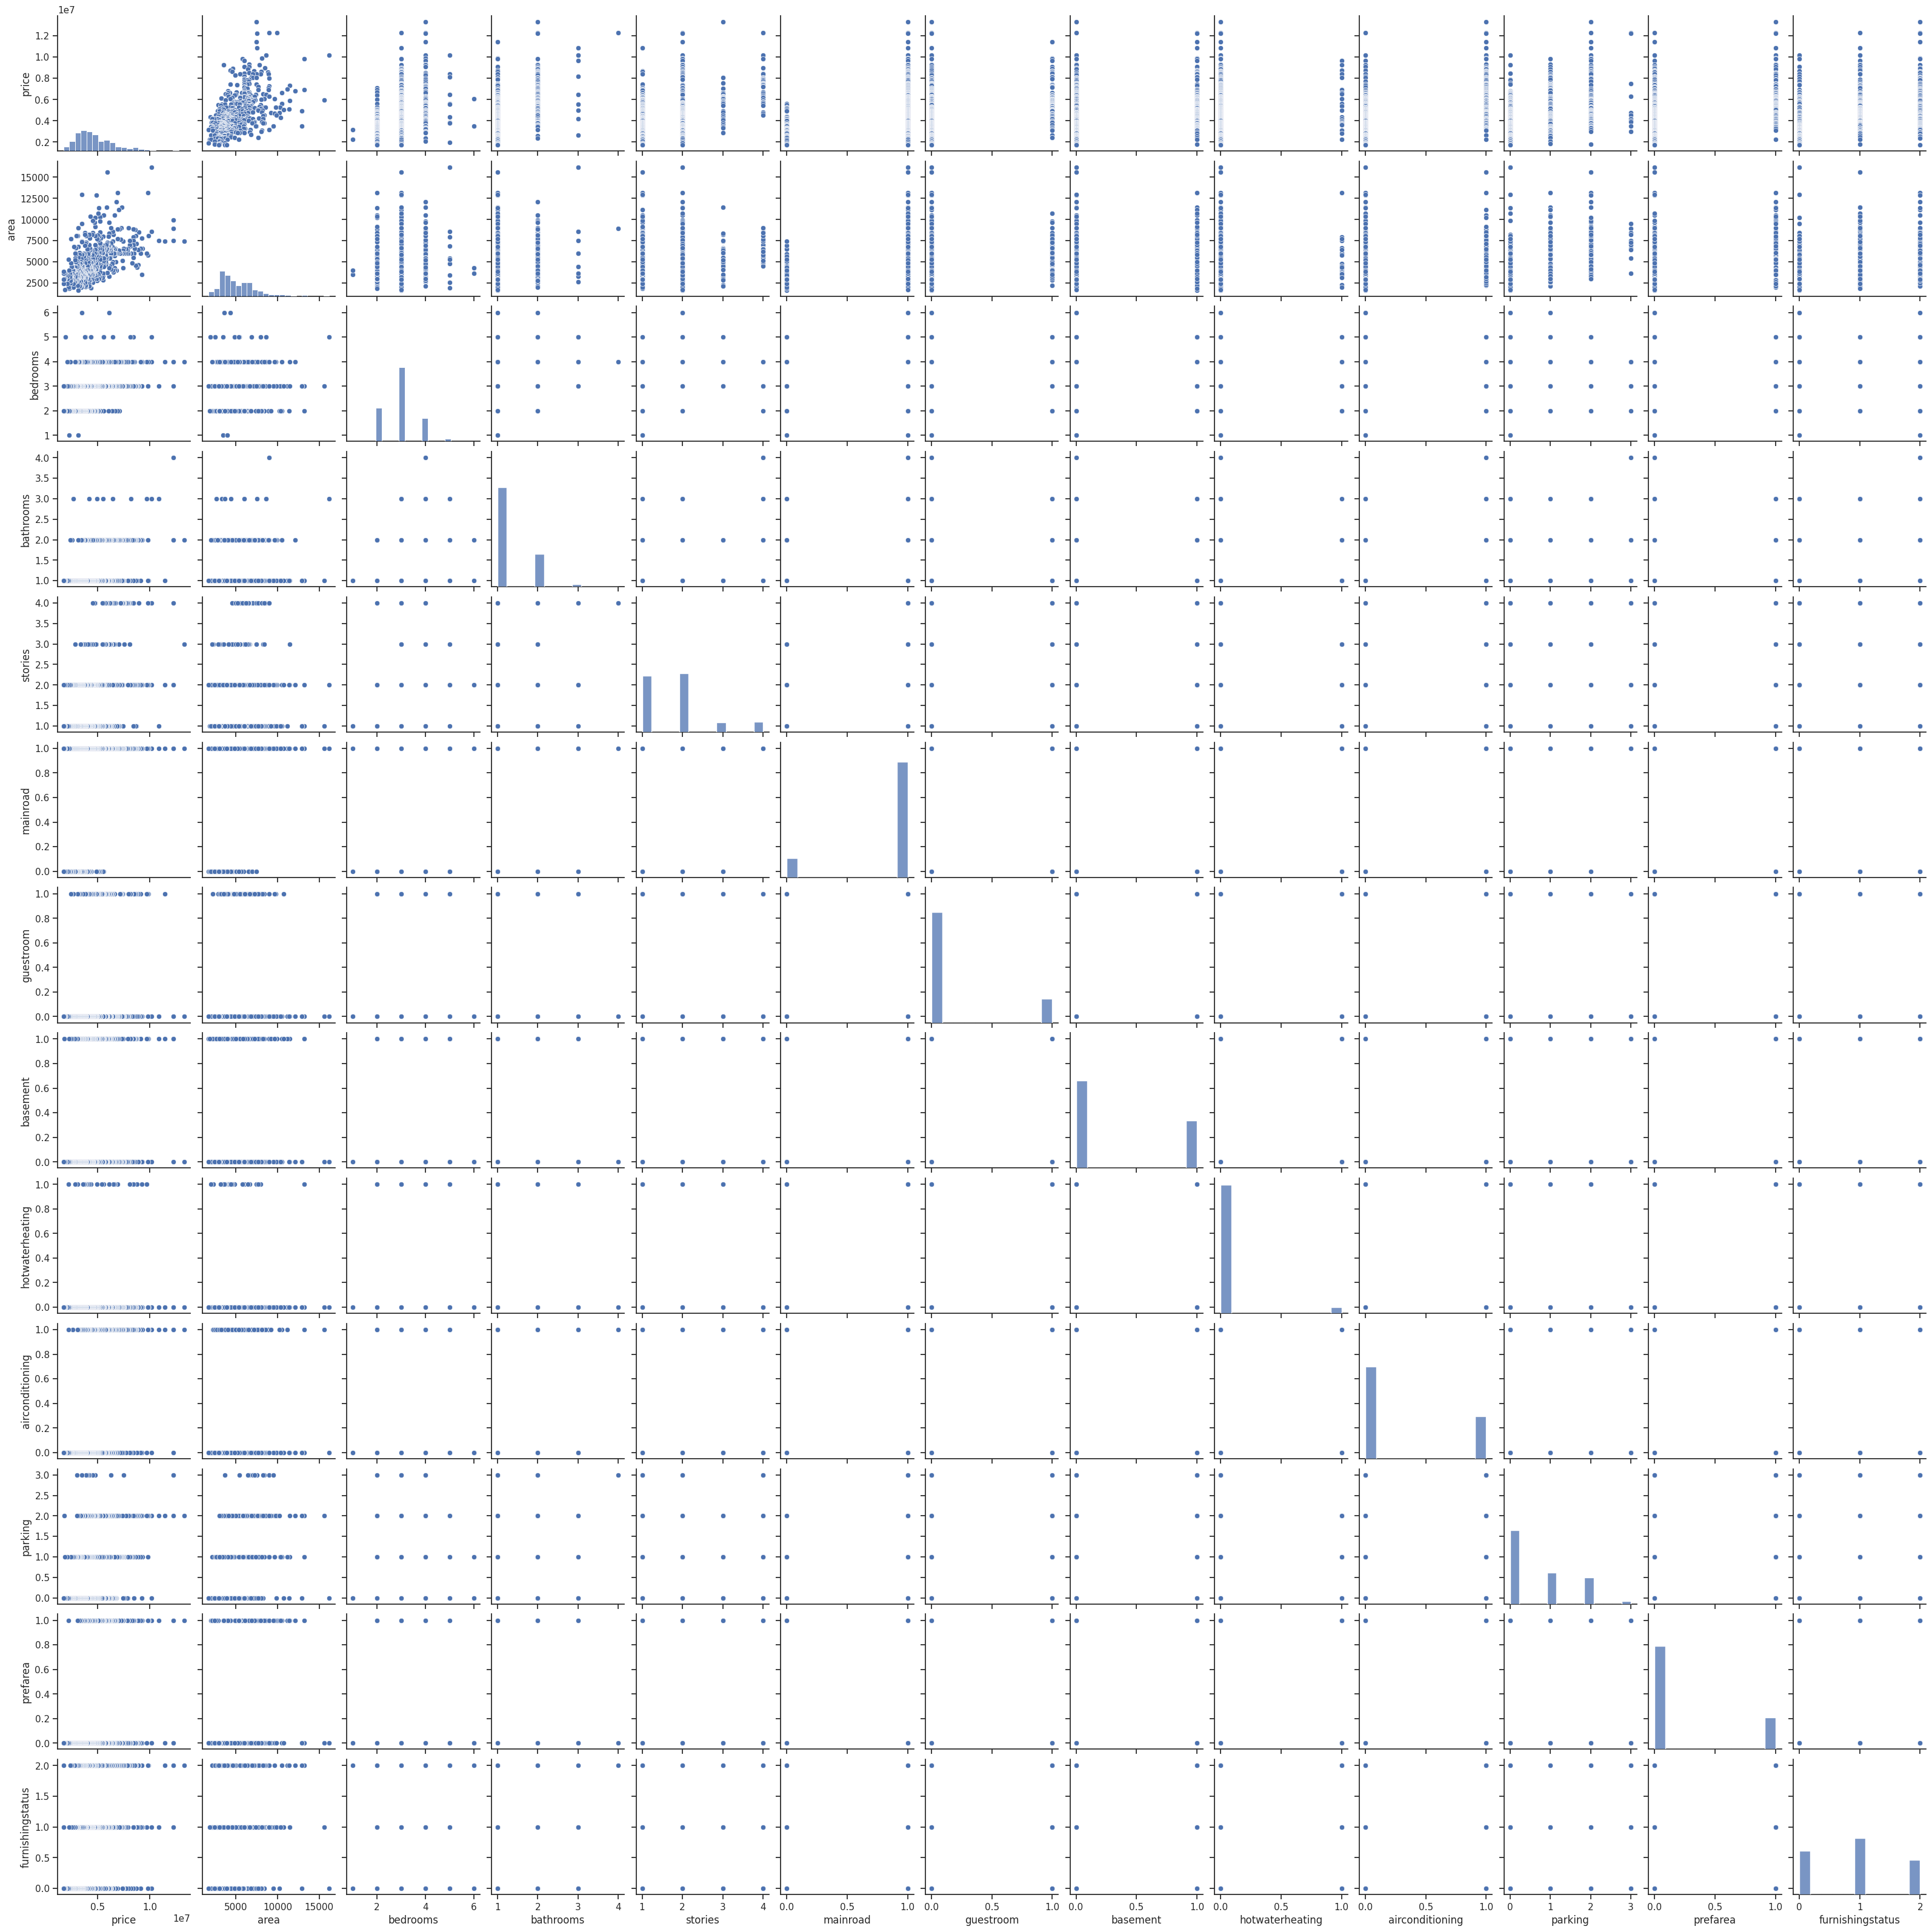

In [ ]:
sns.pairplot(data)

С помощью параметра "hue" возможна группировка по значениям какого-либо признака.

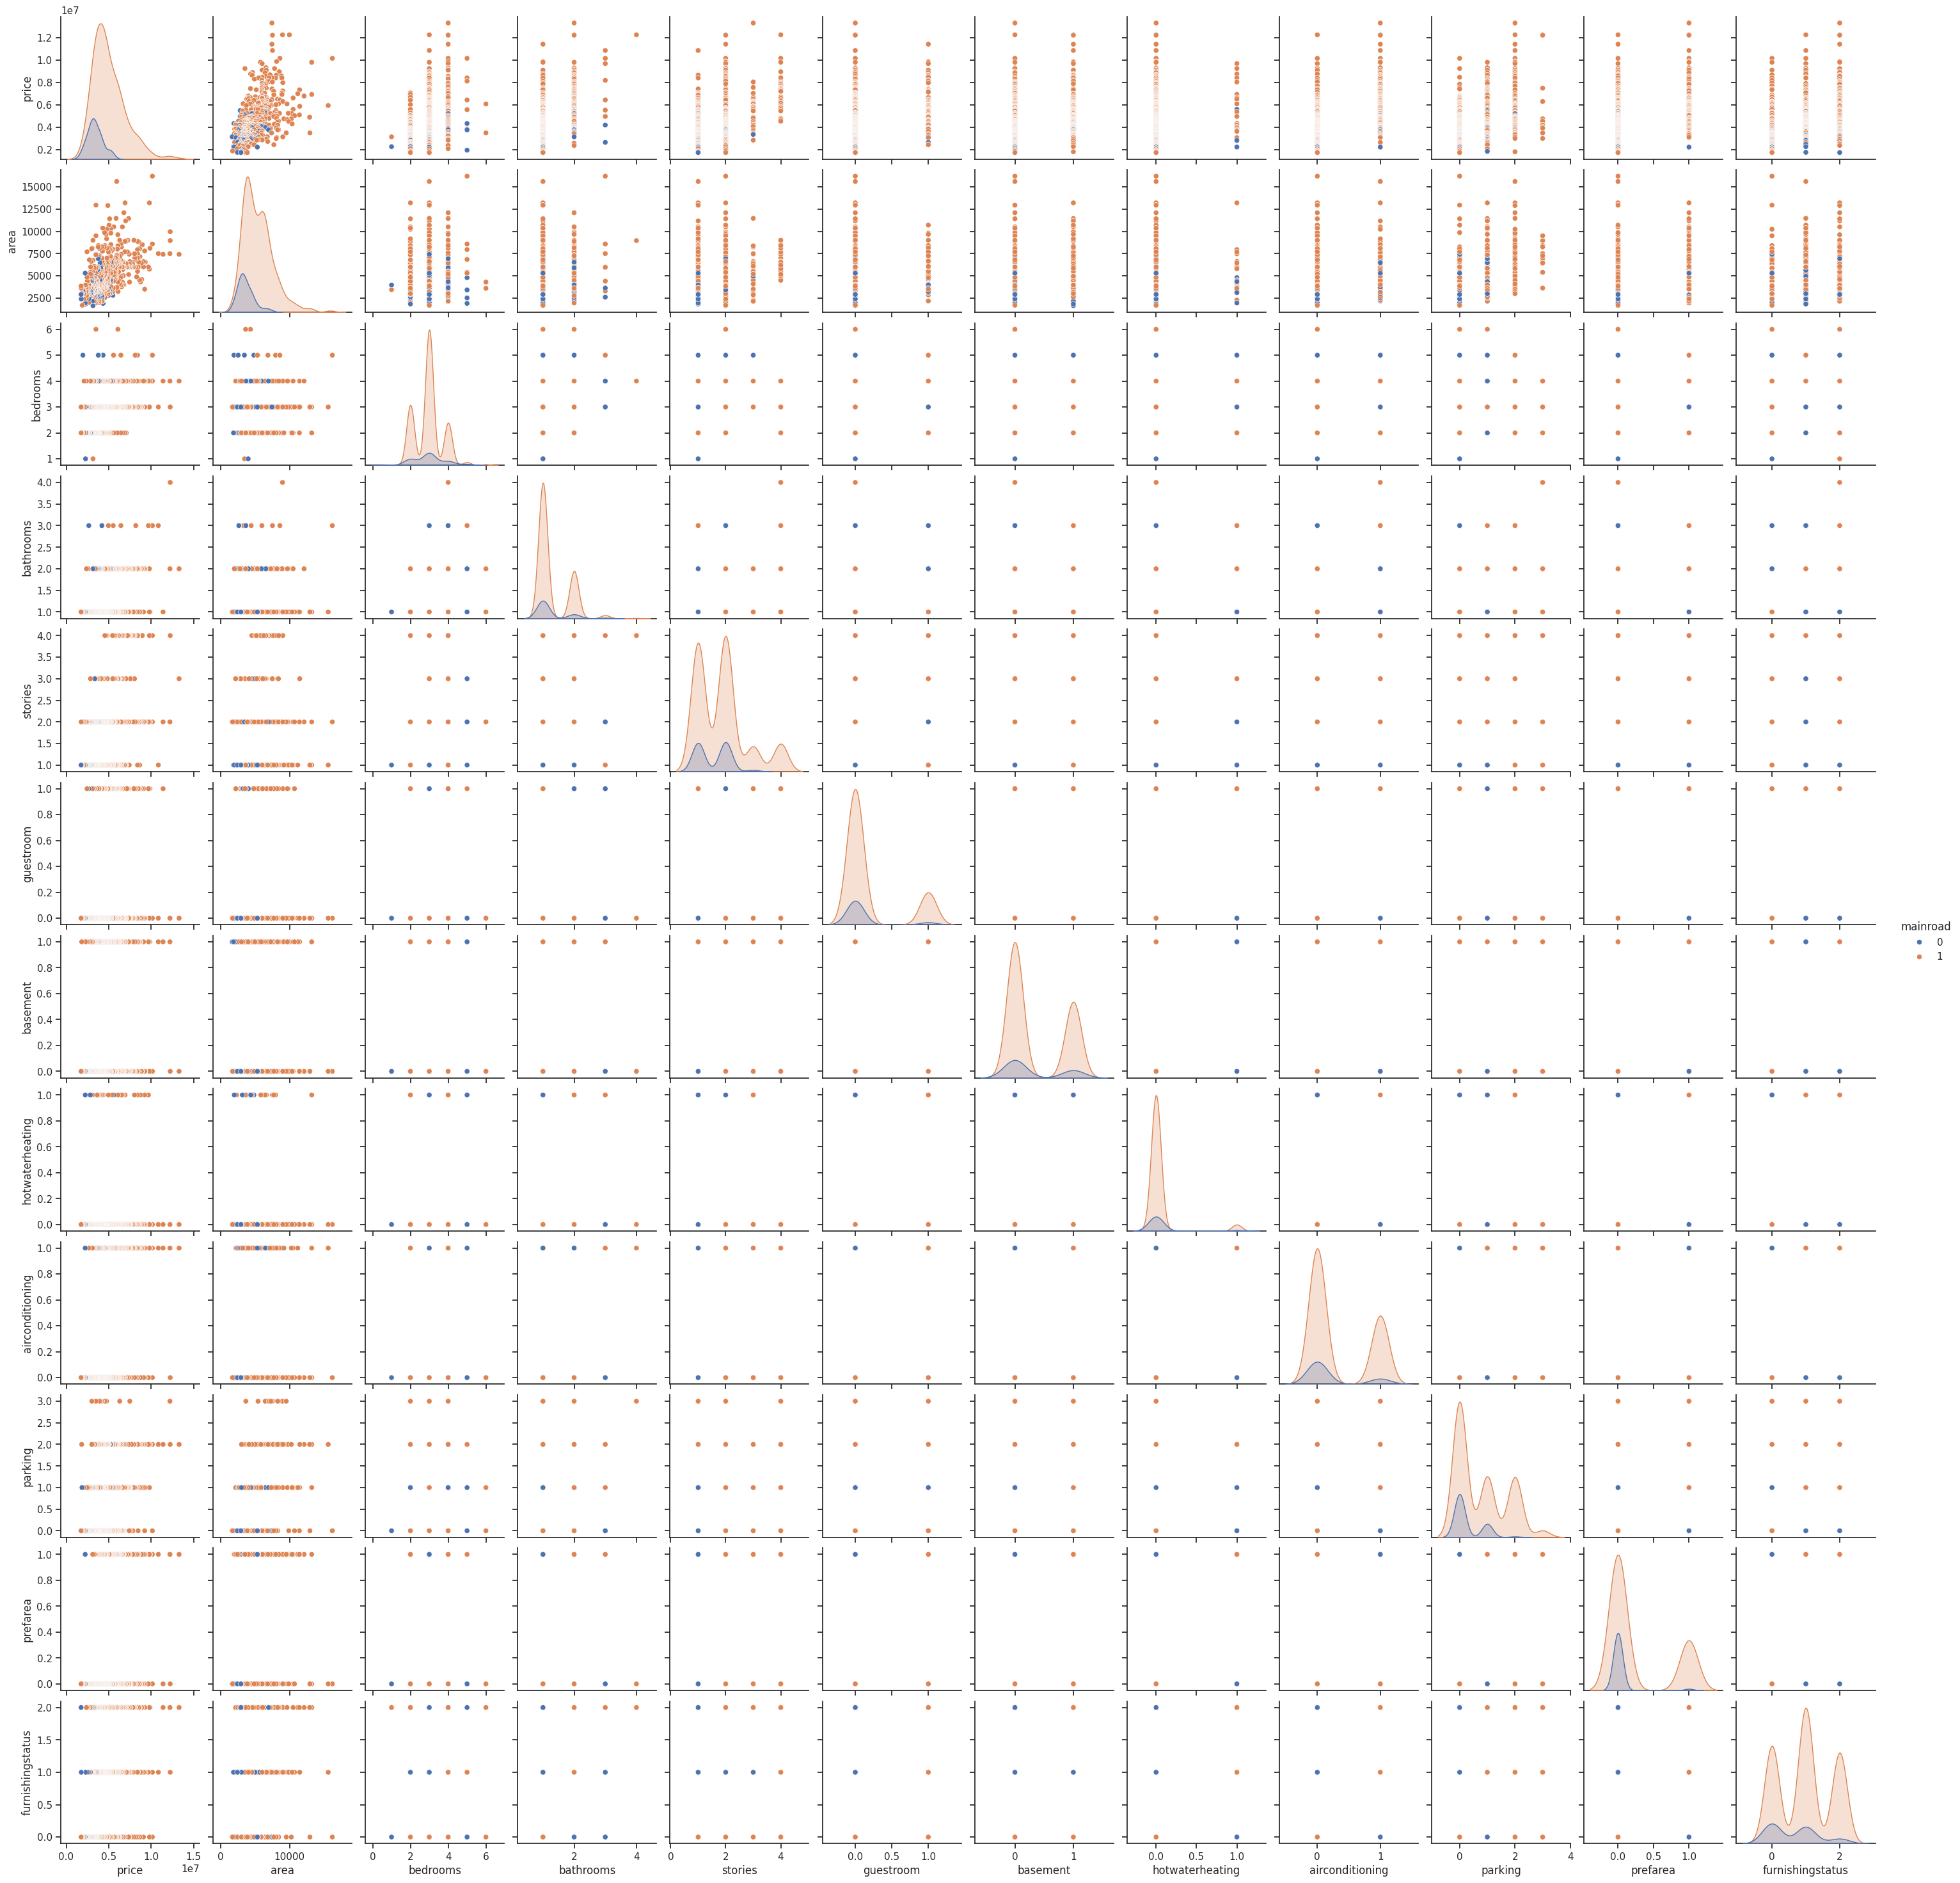

In [ ]:
sns.pairplot(data, hue="mainroad")

###*Ящик с усами*
Отображает одномерное распределение вероятности.

<Axes: xlabel='area'>

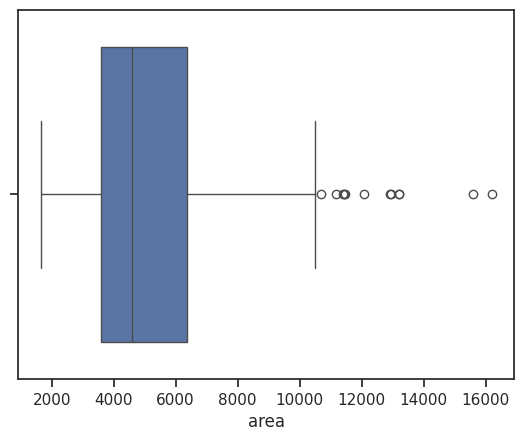

In [ ]:
sns.boxplot(x=data['area'])

<Axes: ylabel='area'>

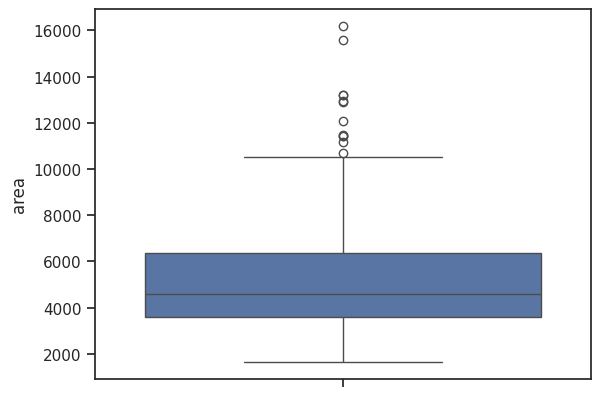

In [ ]:
# По вертикали
sns.boxplot(y=data['area'])

<Axes: xlabel='mainroad', ylabel='area'>

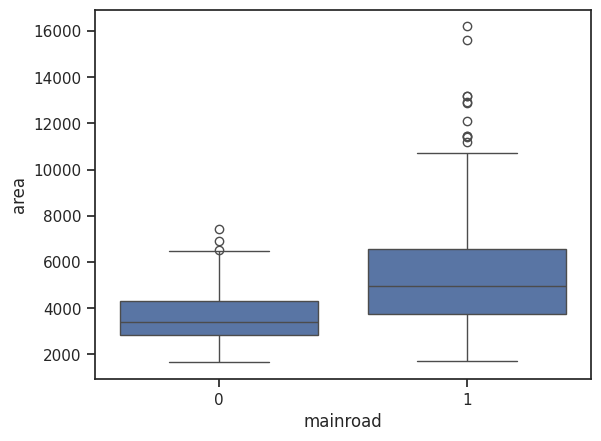

In [ ]:
# Распределение параметра area сгруппированные по mainroad.
sns.boxplot(x='mainroad', y='area', data=data)

###*Violin plot*
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности - https://en.wikipedia.org/wiki/Kernel_density_estimation

<Axes: xlabel='area'>

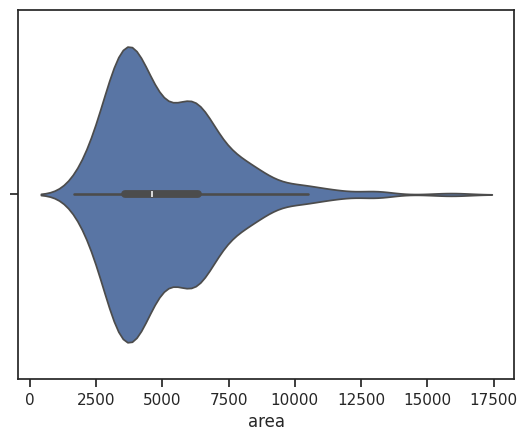

In [ ]:
sns.violinplot(x=data['area'])

<ipython-input-91-9531795d0082>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['area'], ax=ax[1])


<Axes: xlabel='area', ylabel='Density'>

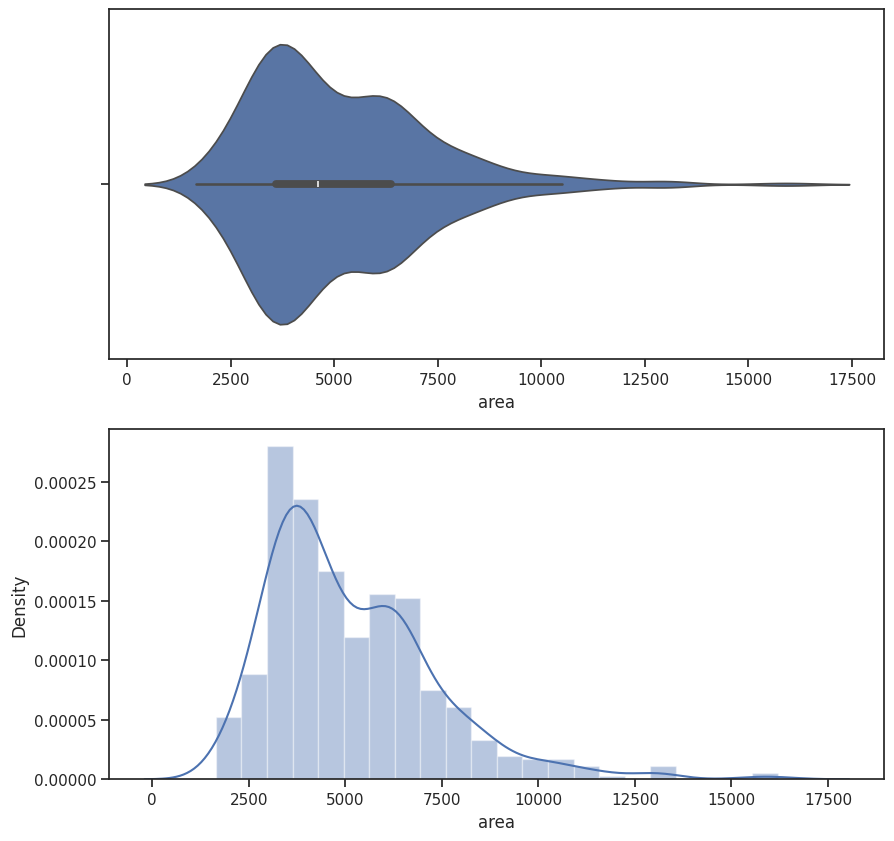

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['area'])
sns.distplot(data['area'], ax=ax[1])

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.

<Axes: xlabel='mainroad', ylabel='area'>

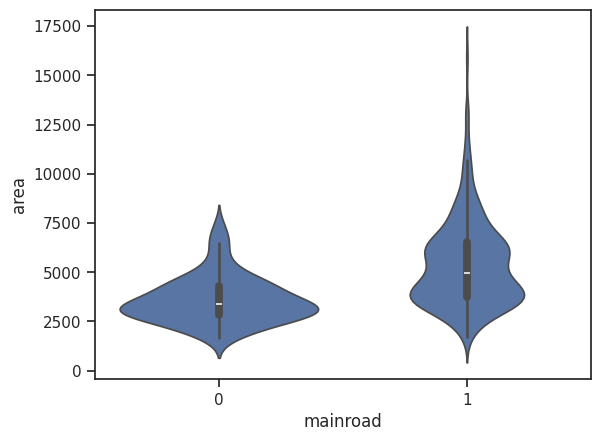

In [ ]:
# Распределение параметра area сгруппированные по mainroad.
sns.violinplot(x='mainroad', y='area', data=data)

#4) Информация о корреляции признаков
Проверка корреляции признаков позволяет решить две задачи:

Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "price"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [ ]:
data.corr()

price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea          0.329777  0.234779  0.079023   0.063472  0.044425  0.199876   
furnishingstatus  0.304721  0.171445  0.123244   0.143559  0.104672  0.156726   

                  guestroom  basement  hotwaterheating  airconditioning  \
price              0.255517  0.187057         0.093073         0.452954   
area               0.140297  0.047417        -0.009229         0.222393   
bedrooms           0.080549  0.097312         0.046049         0.160603   
bathrooms          0.126469  0.102106         0.067159         0.186915   
stories            0.043538 -0.172394         0.018847         0.293602   
mainroad           0.092337  0.044002        -0.011781         0.105423   
guestroom          1.000000  0.372066        -0.010308         0.138179   
basement           0.372066  1.000000         0.004385         0.047341   
hotwaterheating   -0.010308  0.004385         1.000000        -0.130023   
airconditioning    0.138179  0.047341        -0.130023         1.000000   
parking            0.037466  0.051497         0.067864         0.159173   
prefarea           0.160897  0.228083        -0.059411         0.117382   
furnishingstatus   0.118328  0.112831         0.031628         0.150477   

                   parking  prefarea  furnishingstatus  
price             0.384394  0.329777          0.304721  
area              0.352980  0.234779          0.171445  
bedrooms          0.139270  0.079023          0.123244  
bathrooms         0.177496  0.063472          0.143559  
stories           0.045547  0.044425          0.104672  
mainroad          0.204433  0.199876          0.156726  
guestroom         0.037466  0.160897          0.118328  
basement          0.051497  0.228083          0.112831  
hotwaterheating   0.067864 -0.059411          0.031628  
airconditioning   0.159173  0.117382          0.150477  
parking           1.000000  0.091627          0.177539  
prefarea          0.091627  1.000000          0.107686  
furnishingstatus  0.177539  0.107686          1.000000

Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).

На основе корреляционной матрицы можно сделать следующие выводы:

Целевой признак наиболее сильно коррелирует с площадью (0.536) и количеством ванных комнат (0.518). Эти признаки обязательно следует оставить в модели.
Целевой признак отчасти коррелирует с количеством этажей (0.421) и наличием системы кондиционирования (0.453), а также с количеством спелен (0.367) и парковочных мест (0.384). Эти признаки стоит также оставить в модели.
Чуть слабее целевой признак коррелирует с наличием дворика перед домом (0.33), меблировкой (0.3) и тем, что дом находится на главной улице или нет (0.3). О присутсвии этих признаков в модели следует подумать.
Целевой признак слабо коррелирует с наличием подвала (0.187), наличием гостевой (0.256) и  наличием горячей воды (0.093). Скорее всего эти признаки стоит исключить из модели, возможно они только ухудшат качество модели.

Сильнее всего коррелируют количество этажей и количество спален (0.409). Но врядли этого достаточно, для исключения одного из признаков.

Описание метода corr - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

По умолчанию при построении матрицы используется коэффициент корреляции Пирсона. Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

In [ ]:
data.corr(method='pearson')

price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea          0.329777  0.234779  0.079023   0.063472  0.044425  0.199876   
furnishingstatus  0.304721  0.171445  0.123244   0.143559  0.104672  0.156726   

                  guestroom  basement  hotwaterheating  airconditioning  \
price              0.255517  0.187057         0.093073         0.452954   
area               0.140297  0.047417        -0.009229         0.222393   
bedrooms           0.080549  0.097312         0.046049         0.160603   
bathrooms          0.126469  0.102106         0.067159         0.186915   
stories            0.043538 -0.172394         0.018847         0.293602   
mainroad           0.092337  0.044002        -0.011781         0.105423   
guestroom          1.000000  0.372066        -0.010308         0.138179   
basement           0.372066  1.000000         0.004385         0.047341   
hotwaterheating   -0.010308  0.004385         1.000000        -0.130023   
airconditioning    0.138179  0.047341        -0.130023         1.000000   
parking            0.037466  0.051497         0.067864         0.159173   
prefarea           0.160897  0.228083        -0.059411         0.117382   
furnishingstatus   0.118328  0.112831         0.031628         0.150477   

                   parking  prefarea  furnishingstatus  
price             0.384394  0.329777          0.304721  
area              0.352980  0.234779          0.171445  
bedrooms          0.139270  0.079023          0.123244  
bathrooms         0.177496  0.063472          0.143559  
stories           0.045547  0.044425          0.104672  
mainroad          0.204433  0.199876          0.156726  
guestroom         0.037466  0.160897          0.118328  
basement          0.051497  0.228083          0.112831  
hotwaterheating   0.067864 -0.059411          0.031628  
airconditioning   0.159173  0.117382          0.150477  
parking           1.000000  0.091627          0.177539  
prefarea          0.091627  1.000000          0.107686  
furnishingstatus  0.177539  0.107686          1.000000

In [ ]:
data.corr(method='kendall')

price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.422227  0.306770   0.393023  0.286133  0.278966   
area              0.422227  1.000000  0.135422   0.174605  0.047193  0.274464   
bedrooms          0.306770  0.135422  1.000000   0.355017  0.450376 -0.004010   
bathrooms         0.393023  0.174605  0.355017   1.000000  0.289585  0.048880   
stories           0.286133  0.047193  0.450376   0.289585  1.000000  0.092191   
mainroad          0.278966  0.274464 -0.004010   0.048880  0.092191  1.000000   
guestroom         0.246033  0.171974  0.085307   0.133122  0.029931  0.092337   
basement          0.188701  0.051799  0.096652   0.108303 -0.125242  0.044002   
hotwaterheating   0.070140 -0.011198  0.034409   0.067866  0.043986 -0.011781   
airconditioning   0.374885  0.233539  0.171897   0.203092  0.223116  0.105423   
parking           0.282781  0.275404  0.131042   0.164047  0.016622  0.186741   
prefarea          0.285179  0.201945  0.095052   0.076164  0.040276  0.199876   
furnishingstatus  0.272853  0.133232  0.119235   0.145205  0.097997  0.148018   

                  guestroom  basement  hotwaterheating  airconditioning  \
price              0.246033  0.188701         0.070140         0.374885   
area               0.171974  0.051799        -0.011198         0.233539   
bedrooms           0.085307  0.096652         0.034409         0.171897   
bathrooms          0.133122  0.108303         0.067866         0.203092   
stories            0.029931 -0.125242         0.043986         0.223116   
mainroad           0.092337  0.044002        -0.011781         0.105423   
guestroom          1.000000  0.372066        -0.010308         0.138179   
basement           0.372066  1.000000         0.004385         0.047341   
hotwaterheating   -0.010308  0.004385         1.000000        -0.130023   
airconditioning    0.138179  0.047341        -0.130023         1.000000   
parking            0.046219  0.044157         0.079329         0.151235   
prefarea           0.160897  0.228083        -0.059411         0.117382   
furnishingstatus   0.111668  0.107825         0.031720         0.140188   

                   parking  prefarea  furnishingstatus  
price             0.282781  0.285179          0.272853  
area              0.275404  0.201945          0.133232  
bedrooms          0.131042  0.095052          0.119235  
bathrooms         0.164047  0.076164          0.145205  
stories           0.016622  0.040276          0.097997  
mainroad          0.186741  0.199876          0.148018  
guestroom         0.046219  0.160897          0.111668  
basement          0.044157  0.228083          0.107825  
hotwaterheating   0.079329 -0.059411          0.031720  
airconditioning   0.151235  0.117382          0.140188  
parking           1.000000  0.083898          0.163229  
prefarea          0.083898  1.000000          0.101120  
furnishingstatus  0.163229  0.101120          1.000000

In [ ]:
data.corr(method='spearman')

price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.602859  0.390454   0.479912  0.362856  0.340145   
area              0.602859  1.000000  0.176198   0.213793  0.057768  0.334775   
bedrooms          0.390454  0.176198  1.000000   0.377148  0.504291 -0.004235   
bathrooms         0.479912  0.213793  0.377148   1.000000  0.308769  0.049335   
stories           0.362856  0.057768  0.504291   0.308769  1.000000  0.097185   
mainroad          0.340145  0.334775 -0.004235   0.049335  0.097185  1.000000   
guestroom         0.299990  0.209764  0.090087   0.134360  0.031553  0.092337   
basement          0.230085  0.063181  0.102068   0.109310 -0.132026  0.044002   
hotwaterheating   0.085522 -0.013659  0.036337   0.068498  0.046369 -0.011781   
airconditioning   0.457100  0.284857  0.181529   0.204981  0.235203  0.105423   
parking           0.365372  0.353259  0.146780   0.173982  0.018389  0.197218   
prefarea          0.347720  0.246321  0.100379   0.076872  0.042458  0.199876   
furnishingstatus  0.343910  0.169688  0.132551   0.155362  0.107972  0.156625   

                  guestroom  basement  hotwaterheating  airconditioning  \
price              0.299990  0.230085         0.085522         0.457100   
area               0.209764  0.063181        -0.013659         0.284857   
bedrooms           0.090087  0.102068         0.036337         0.181529   
bathrooms          0.134360  0.109310         0.068498         0.204981   
stories            0.031553 -0.132026         0.046369         0.235203   
mainroad           0.092337  0.044002        -0.011781         0.105423   
guestroom          1.000000  0.372066        -0.010308         0.138179   
basement           0.372066  1.000000         0.004385         0.047341   
hotwaterheating   -0.010308  0.004385         1.000000        -0.130023   
airconditioning    0.138179  0.047341        -0.130023         1.000000   
parking            0.048813  0.046634         0.083780         0.159721   
prefarea           0.160897  0.228083        -0.059411         0.117382   
furnishingstatus   0.118162  0.114095         0.033564         0.148340   

                   parking  prefarea  furnishingstatus  
price             0.365372  0.347720          0.343910  
area              0.353259  0.246321          0.169688  
bedrooms          0.146780  0.100379          0.132551  
bathrooms         0.173982  0.076872          0.155362  
stories           0.018389  0.042458          0.107972  
mainroad          0.197218  0.199876          0.156625  
guestroom         0.048813  0.160897          0.118162  
basement          0.046634  0.228083          0.114095  
hotwaterheating   0.083780 -0.059411          0.033564  
airconditioning   0.159721  0.117382          0.148340  
parking           1.000000  0.088606          0.183138  
prefarea          0.088606  1.000000          0.107000  
furnishingstatus  0.183138  0.107000          1.000000

В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен.

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

Используем метод heatmap библиотеки seaborn - https://seaborn.pydata.org/generated/seaborn.heatmap.html

<Axes: >

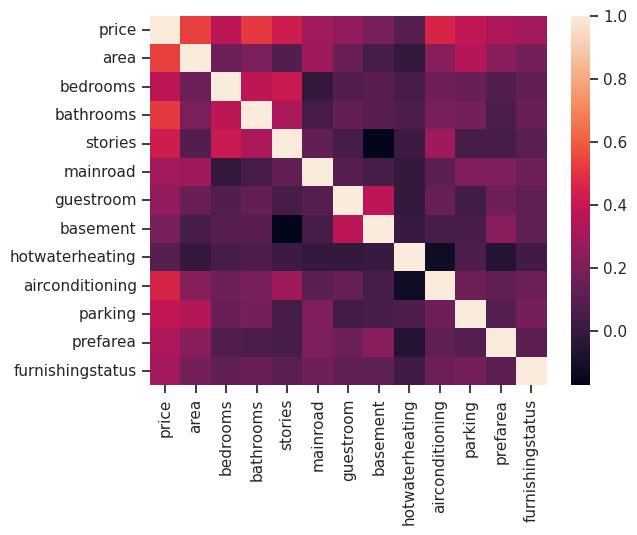

In [ ]:
sns.heatmap(data.corr())

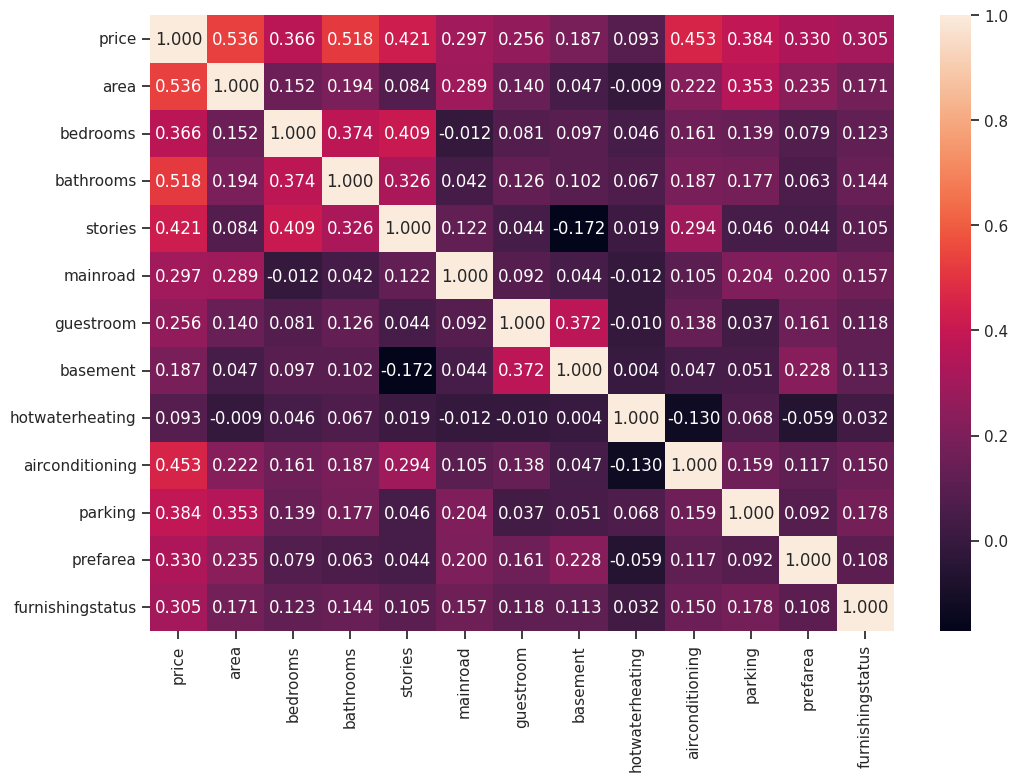

In [ ]:
# Вывод значений в ячейках
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(), annot=True, fmt='.3f')
plt.show()

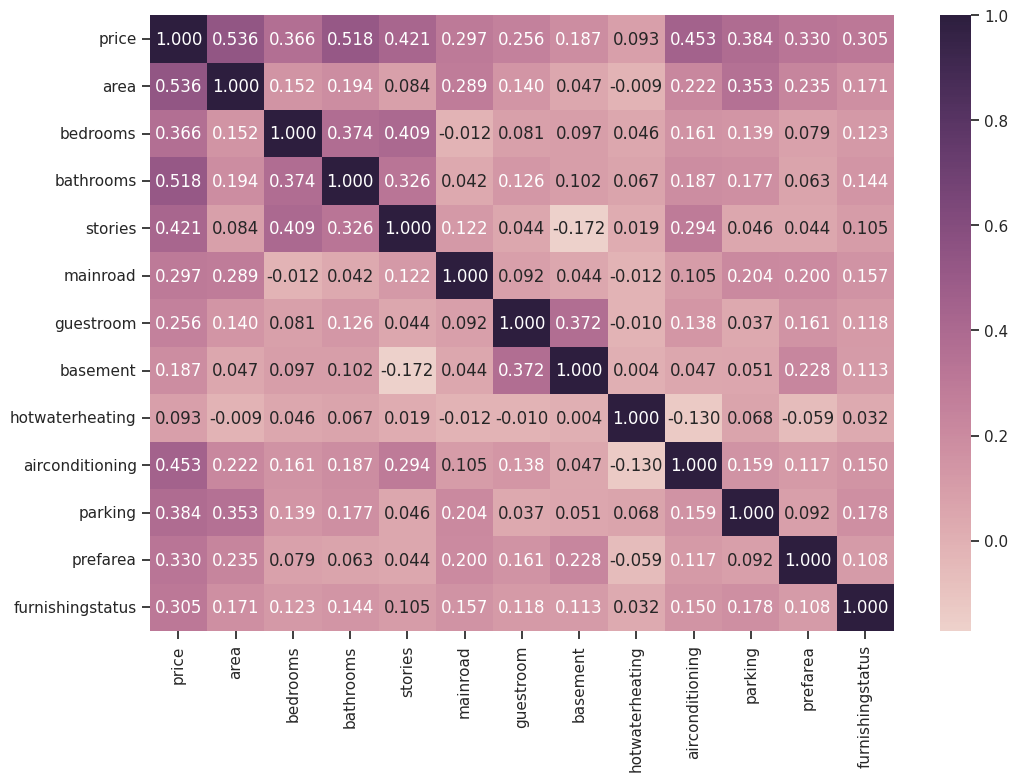

In [ ]:
# Изменение цветовой гаммы
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, fmt='.3f')
plt.show()

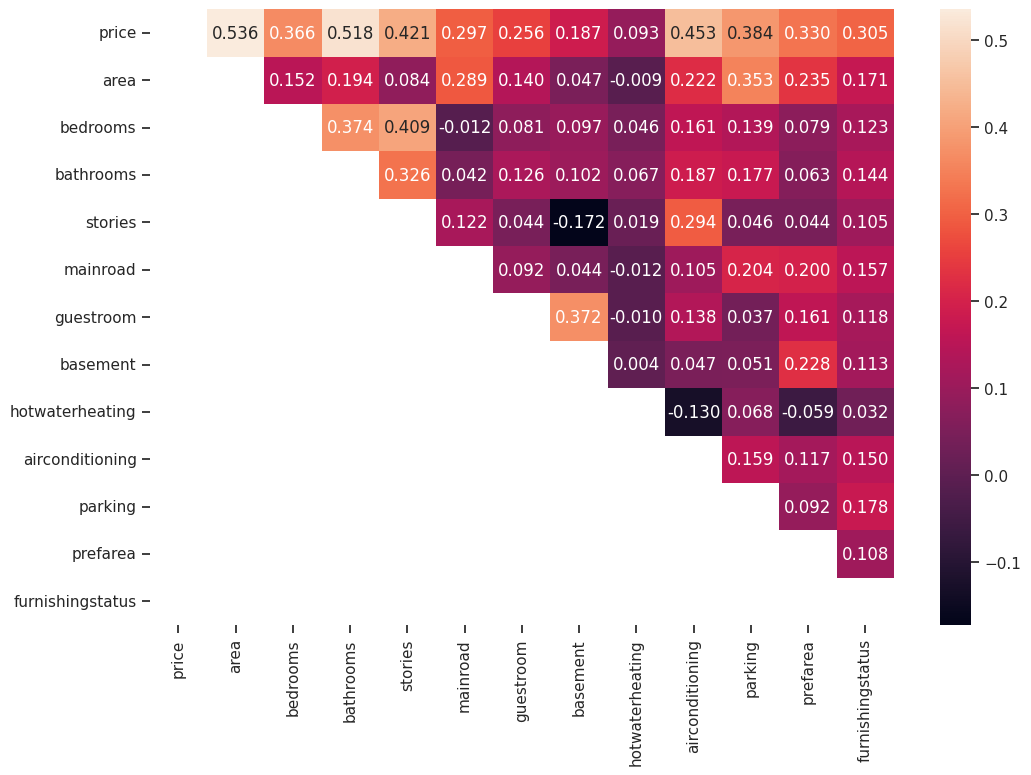

In [ ]:
plt.figure(figsize = (12,8))
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool_)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')
plt.show()

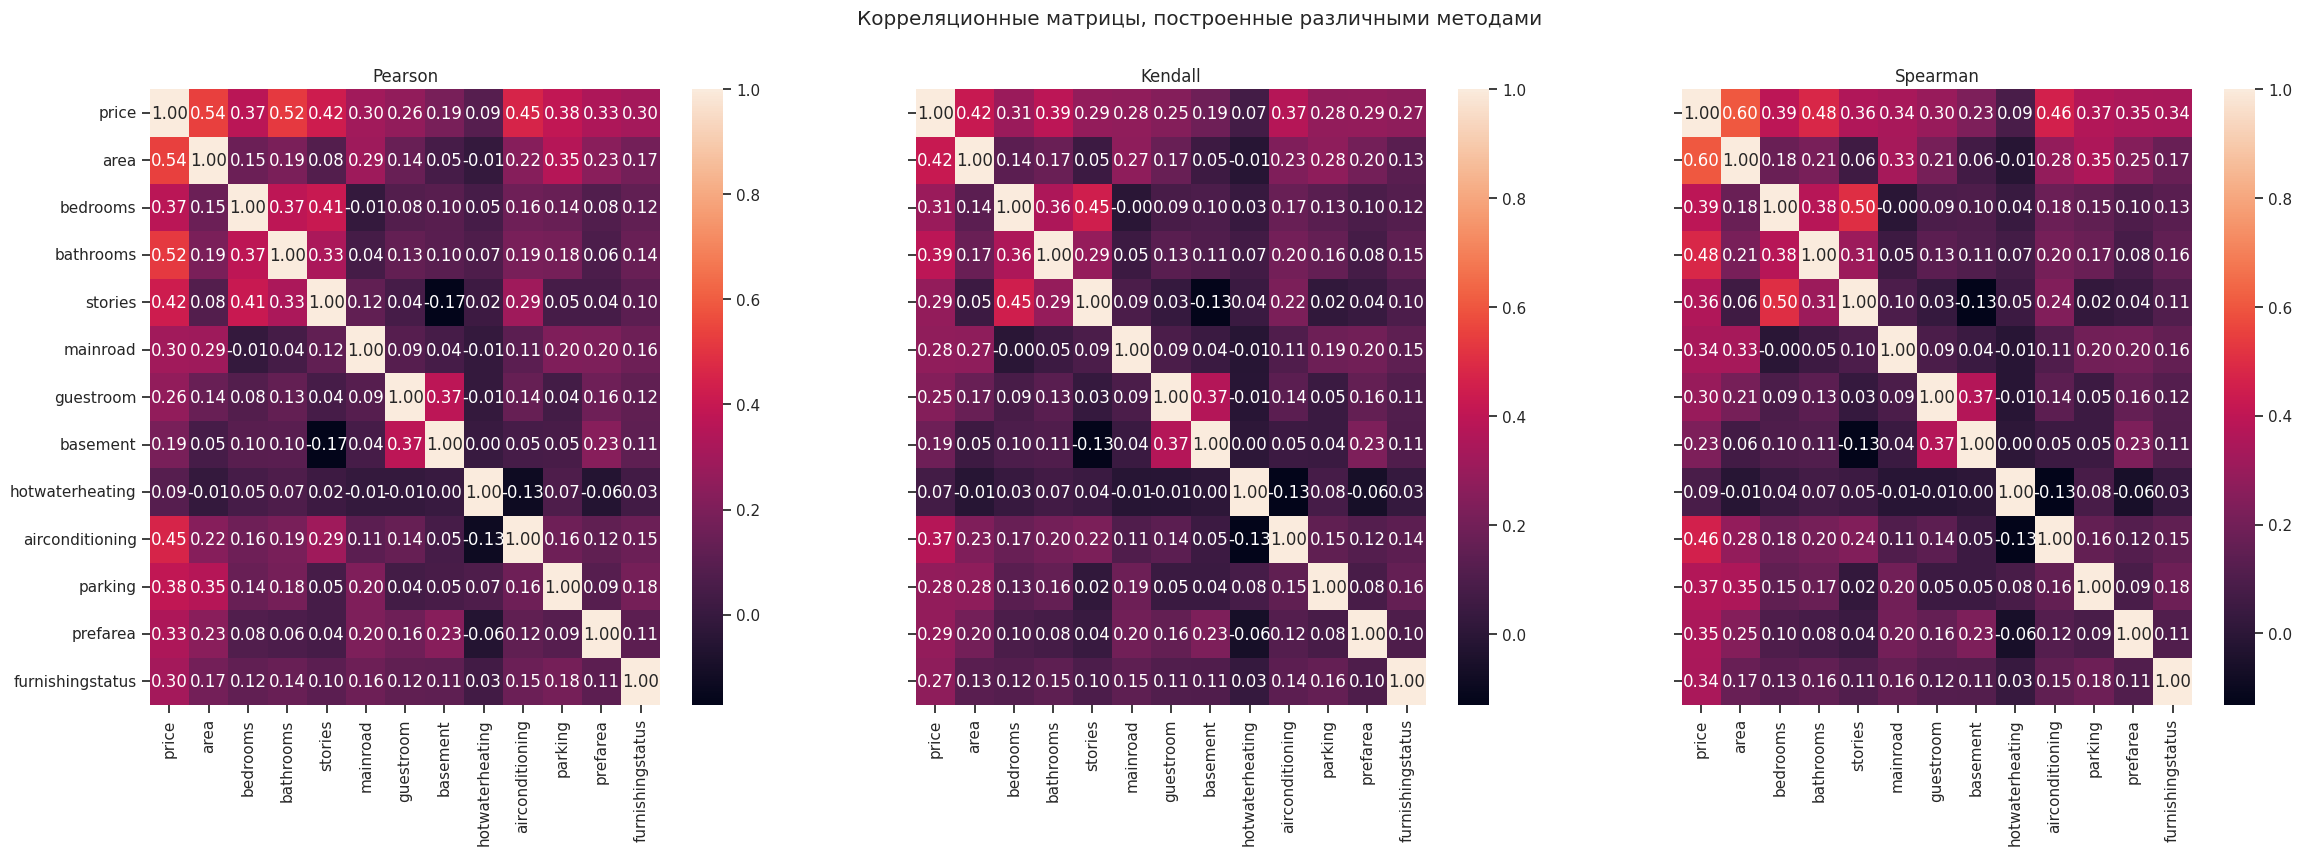

In [ ]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(28,8))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

###*Тепловая карта с указание размера*
* Функция plt.subplots создает область окна нужного размера, в которую может выводиться график.
* Параметр figsize=(размер по горизонтали, размер по вертикали).
* По умолчанию размер задается в дюймах, но возможно использование и других единиц измерения - https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/figure_size_units.html
* Функция sns.heatmap содержит параметр ax=ax, который ссылается на область, созданную plt.subplots, поэтому график выводится в данной области.

<Axes: >

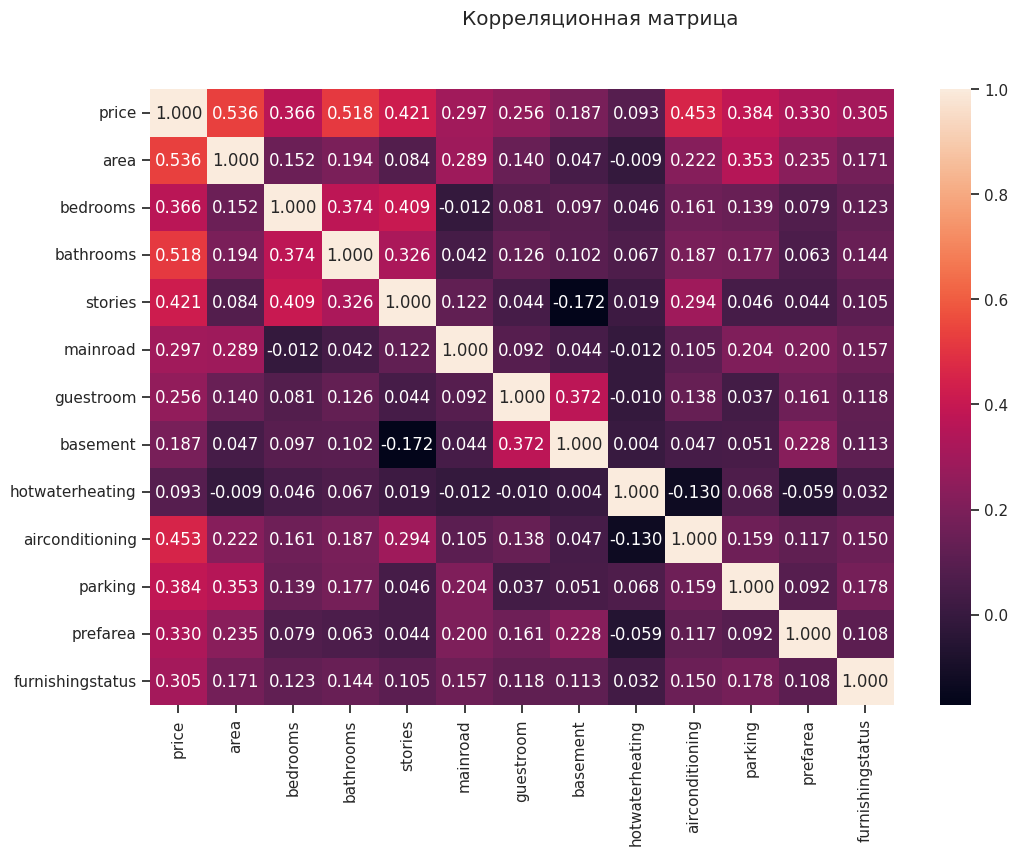

In [ ]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(12,8))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.3f')

Необходимо отметить, что тепловая карта не очень хорошо подходит для определения корреляции нецелевых признаков между собой.

В примере тепловая карта помогает определить заметную корреляцию между признаками количество спален и количество этажей, но врядли достаточную для исключения одного из признаков из модели (но это в данном примере).

Однако в реальной модели могут быть сотни признаков и коррелирующие признаки могут образовывать группы, состояшие более чем из двух признаков. Увидеть такие группы с помощью тепловой карты сложно.

Для решения задачи предлагается новый вариант визуализации - "Солнечная корреляционная карта" Solar correlation map.

К сожалению, данная библиотека пока работает только через файловый интерфейс и не предназначена для встраивания в ноутбук.

Примеры статей с описанием работы библиотеки:

https://www.oreilly.com/learning/a-new-visualization-to-beautifully-explore-correlations
https://www.mtab.com/the-puzzle-of-visualizing-correlations/